In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("E:\\download folder\\Salary_Data.csv")
df.shape

(30, 2)

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: ylabel='YearsExperience'>

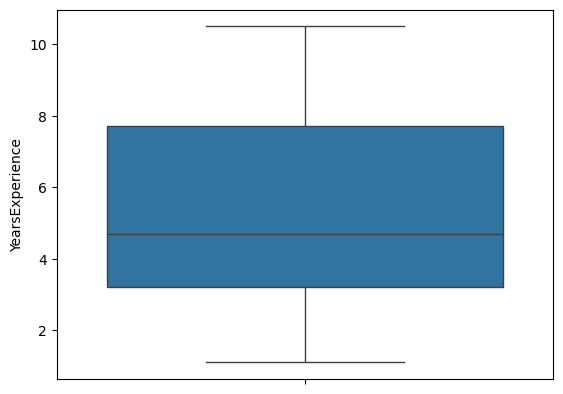

In [5]:
sns.boxplot(df["YearsExperience"])

<Axes: ylabel='Salary'>

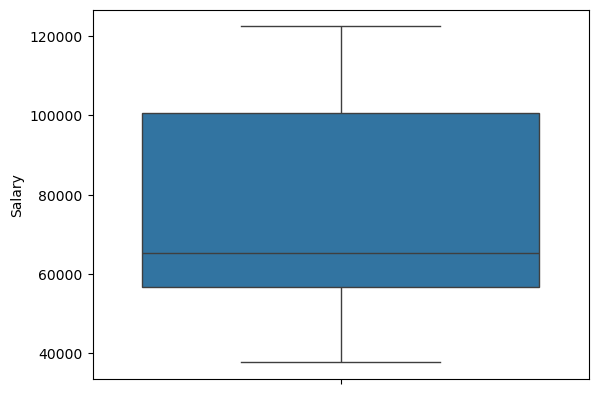

In [6]:
sns.boxplot(df["Salary"])

Text(0.5, 1.0, 'Salary')

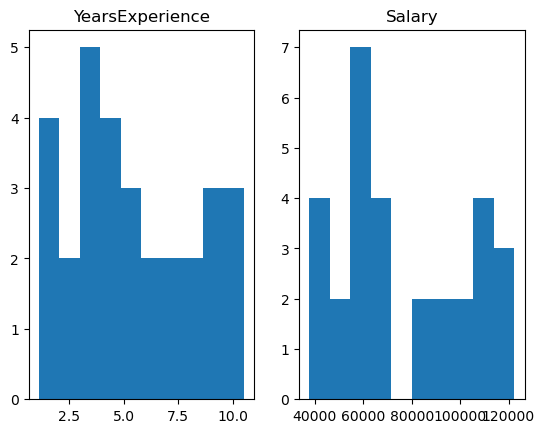

In [10]:
plt.subplot(1,2,1)
plt.hist(df["YearsExperience"])
plt.title("YearsExperience")
plt.subplot(1,2,2)
plt.hist(df["Salary"])
plt.title("Salary")

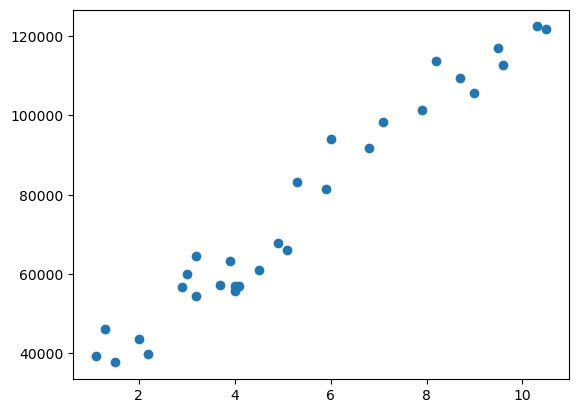

In [11]:
plt.scatter(df["YearsExperience"],df["Salary"])

In [23]:
x= df["YearsExperience"]
y=df["Salary"]
x= np.array(x)
x= x.reshape(-1, 1)

In [24]:
#Data partition

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30)

In [28]:
#Model fitting

from sklearn.linear_model import LinearRegression

LR= LinearRegression()
LR.fit(x_train, y_train)
y_pred_train= LR.predict(x_train)
y_pred_test= LR.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

training_error= mean_squared_error(y_train, y_pred_train)
testing_error= mean_squared_error(y_test, y_pred_test)

training_score= r2_score(y_train, y_pred_train)
testing_score= r2_score(y_test, y_pred_test)

print("Root mean squared error of training: ", np.sqrt(training_error).round(2))
print("Root mean squared error of testing: ", np.sqrt(testing_error).round(2))

print("R square of training: ",(training_score).round(2))
print("R square of testing: ",(testing_score).round(2))

Root mean squared error of training:  5846.0
Root mean squared error of testing:  5000.09
R square of training:  0.96
R square of testing:  0.93


In [29]:
# Cross validation

training_error= []
testing_error=[]

training_score=[]
testing_score=[]

for i in range(1,201):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.30, random_state=i)
    LR.fit(x_train, y_train)
    y_pred_train= LR.predict(x_train)
    y_pred_test= LR.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_pred_train))
    testing_error.append(mean_squared_error(y_test, y_pred_test))
    training_score.append(r2_score(y_train, y_pred_train))
    testing_score.append(r2_score(y_test, y_pred_test))
print("Root mean squared error of training: ", np.mean(np.sqrt(training_error)).round(2))
print("Root mean squared error of testing: ", np.mean(np.sqrt(testing_error)).round(2))

print("R square of training: ",np.mean((training_score)).round(2))
print("R square of testing: ", np.mean((testing_score)).round(2))

Root mean squared error of training:  5560.75
Root mean squared error of testing:  5803.82
R square of training:  0.96
R square of testing:  0.94
